# Kurvendiskussion und Optimierung

In diesem Kapitel werden wir uns darum kümmern, wie man Kurvendiskussionen mit einem Computer realisieren kann. Integrieren
und noch wichtiger Differnezieren haben wir bereits in den vorangegangenen Kapiteln behandelt. Jetzt fehlt uns nur noch
die Fähigkeit, um Nullstellen zu finden. Dazu werden wir das vielleicht schon bekannte [Newton-Verfahren](https://de.wikipedia.org/wiki/Newtonverfahren)
nutzen.

## Das Newton-Verfahren

Das Newton-Verfahren dient, wie bereits angedeutet zum numerischen Finden von Nullstellen einer Funktion. Dabei versuchen
wir eine möglichst genaue Approximation der Lage zu finden. Insgesamt ist dieses Verfahren verhältnismäßig einfach, weshalb
es ein paar Dinge zu beachten gibt. Dies wird aber zu gegebener Zeit eingeführt. Aber zunächst zur Intuition. Sei 
unsere Funktion $f: \mathbb{R} \rightarrow \mathbb{R}$ gegeben durch:

$$
f(x) = x^2 - 1
$$

Von dieser Funktion wissen wir natürlich die genauen Nullstellen. Grundidee des Newton-Verfahrens ist, dass man dem Verlauf 
der Funktion in Richtung einer Nullstelle von einem gegebenem Punkt folgt. Um "dem Verlauf einer Funktion zu folgen", 
brauchen wir natürlich wieder die Ableitung an unserem Anfangspunkt. Schauen wir uns dies einmal genauer für den Punkt
$x_0=2$ mit der dazugehörigen Tangente an.

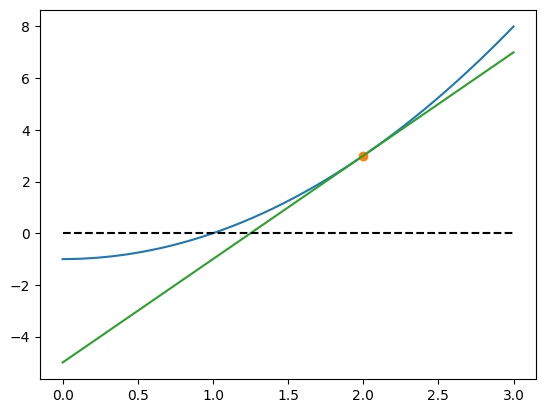

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Die Grenzen
a = 0
b = 3

# unser Anfangspunkt
x_0 = 2
# das `h` zum Differenzieren
h = 1e-6

# unsere Funktion
def f(x):
    return x**2 - 1

# Ableitung an der Stelle x
def df(x):
    return (f(x+h) - f(x-h)) / (2*h)

# wir teilen den Bereich in 1000 Teile
x_vals = np.linspace(a, b, 1000)
# wir berechnen unsere Funktionswerte
f_vals = [f(x) for x in x_vals]
# die Tangente
df_vals = [df(x_0) * (x - x_0) + f(x_0) for x in x_vals]
# die x-Achse
x_axis = [0 for x in x_vals]

# wir plotten die Funktion
plt.plot(x_vals, f_vals)
# Funktion an der Stelle x=2
plt.plot(x_0, f(x_0), 'o')
# die Tangente
plt.plot(x_vals, df_vals)
# die x-Achse
plt.plot(x_vals, x_axis, '--', color='black')
plt.show()

Wie wir sehen können, ist die Nullstelle unserer Tangente schon relativ dicht an der gesuchten Nullstelle. Im nächsten
Schritt können wir dann von der Nullstelle unserer Tangente starten, und von dortaus weiterrechnen. Und hiermit
haben wir (informell) das Newton Verfahren hergeleitet. In einer Formel ausgedrückt sieht dies dann wie folgt aus:

$$
x_{n+1} := x_n - \frac{f(x_n)}{f'(x_n)}
$$
für ein gegebenes $x_0$. Der daraus resultierende Code sieht ähnlich zu dem von Oben aus und die nötigen Erweiterungen
sollte mittlerweile jeder selbst vornehmen können (mit gegebener Abbruch Bedingung). Damit ist das Newton-Verfahren
auch schon abgeschlossen

**Kurze Anmerkung:** In dem zuletzt gezeigten Code haben wir zur Berechnung der Tangente immer und immer wieder 
f(x_0) und df(x_0) berechnet. Dies ist natürlich beliebig ineffizient und man würde in einer realen Implementierung
dies im Voraus berechnen. Für unser kleines Beispiel hier (und auch für die Hausaufgaben) ist diese Implementierung völlig
ausreichend. Wer dies aber dennoch implementieren möchte, kann dies natürlich gerne tun, sollte aber bedenken, dass
der Code schnell unleserlicher wird.

````{admonition} Das Problem des Newton-Verfahrens
:class: tip
Wie man bereits vermuten kann, findet dieses Verfahren höchstens eine Nullstelle. Um die andere Nullstelle in unserem
Beispiel zu finden, müssten wir den Algorithmus auf der anderen Seite wieder starten, bis er die nächste Nullstelle
gefunden hat. 

Ein weiteres Problem dieses Verfahrens ist das folgende. Stellen wir uns zum Beispiel vor, dass wir den Algorithmus
in obiger Funktion an der Stelle $x_0 = 0$ starten. Es sollte offensichtlich sein, dass wir dann ein Problem haben.
Um solche und noch weitere Probleme in Praxis zu umgehen, plottet man zuerst die Funktion, bei der man die Nullstelle(n) 
finden möchte und initialisiert den Algorithmus dann nah an einer Nullstelle.
````

## Kurvendiskussion

Nun haben wir alle benötigten Kenntnisse, damit wir eine Kurvendiskussion durchspielen können. Der Einfachheit halber nehmen
wir wieder unsere Funktion $f$ von obigen Beispiel, da wir dort unsere Nullstellen bereits bestimmt haben. Berechnen wir
zunächst die erste Ableitung und plotten diese:

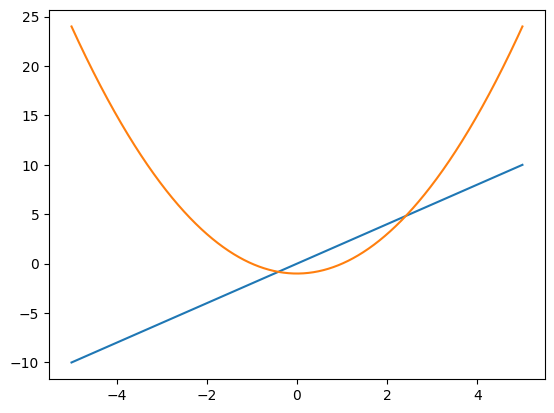

In [24]:
# wie immer unsere Grenzen
a = -5
b = 5

# Diskretisierung
x_vals = np.linspace(a, b, 1_000)
h = 1e-6

# unsere Funktion
def f(x):
    return x**2 - 1

# die numerische Ableitung an der Stelle x
def df(x):
    return (f(x+h) - f(x-h)) / (2*h)

# die Werte der Funktion
f_vals = [f(x) for x in x_vals]
# die Werte der Ableitung
df_vals = [df(x) for x in x_vals]

# plotten
plt.plot(x_vals, df_vals)
plt.plot(x_vals, f_vals)
plt.show()

Jetzt berechenen wir die Nullstellen der ersten Ableitung aus den gerade berechenten Werten der Ableitung.

In [22]:
# wir setzen hier einfach fest, dass wir nach 1_000
# Iterationen die Nullstellen suche abbrechen
n = 1_000
xn = 0.1

def d2f(x):
    return (f(x+h) + f(x-h) - 2*f(x)) / (h**2)

for _ in range(n):
    xn = xn - df(xn) / d2f(xn)

xn

9.486665689219777e-18

Wir bekommen hier sogar die (quasi) exakte Lösung! Jetzt müssen wir nur noch die Art der Extremstelle berechnen und
dann sind wir fertig.

In [23]:
d2f(xn)

1.999955756559757

Wie erwartet sehen wir, dass hier ein **lokales** Minimum vorliegt, und da wir offensichtlich nur eine Extremstelle haben, 
ist diese auch das **globale** Minimum. Und hiermit haben wir unsere erste numerische Kurvendiskussion durchgeführt. Hiermit
ist dieses Kapitel abgeschlossen.